In [1]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import YOUTUBE_API_KEY
from api_methods import get_channel_stats, get_video_ids

In [2]:
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

# Example: Fetching video statistics
video_id = 'zvxNkUoKbA0'
request = youtube.videos().list(
    part='statistics',
    id=video_id
)
response = request.execute()

statistics = response['items'][0]['statistics']
print(statistics)

{'viewCount': '4786177', 'likeCount': '41344', 'favoriteCount': '0', 'commentCount': '6889'}


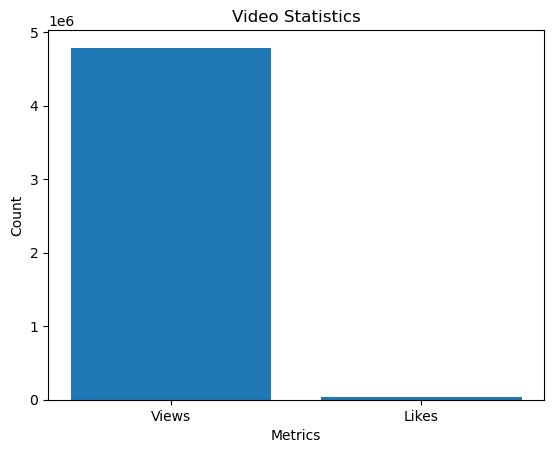

In [11]:
import matplotlib.pyplot as plt

# Assuming 'statistics' contains 'viewCount' and 'likeCount' values
views = int(statistics['viewCount'])
likes = int(statistics['likeCount'])

labels = ['Views', 'Likes']
values = [views, likes]

plt.bar(labels, values)
plt.title('Video Statistics')
plt.xlabel('Metrics')
plt.ylabel('Count')
plt.show()


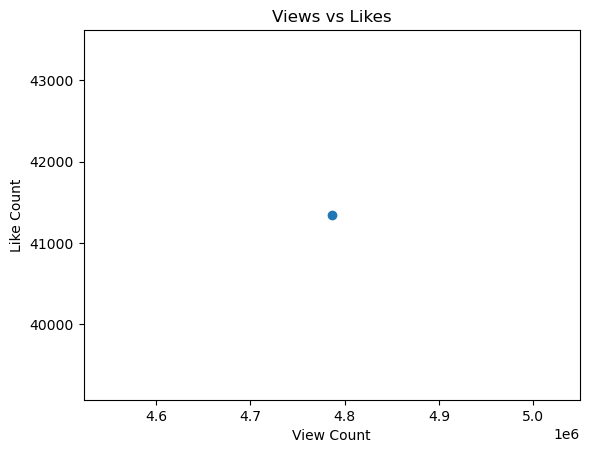

In [12]:
import matplotlib.pyplot as plt

# Assuming 'statistics' contains 'viewCount' and 'likeCount' values
views = int(statistics['viewCount'])
likes = int(statistics['likeCount'])

plt.scatter(views, likes)
plt.title('Views vs Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()


In [13]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    maxResults=100  # İsteğe bağlı: En fazla 100 yorumu almak için
)
response = request.execute()

comments = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for comment in comments:
    print(comment)

Alev gercekten Mustafaya, Umuta birde Nursema nasil yapabildin böyle birseyi.  Insanlari suclayarak kendini Mahsummu zannediyorsun. Tam bir Pisliksin gercekten.
Kadın duyarı kasayım derken metrese yazdıkları sahnelere bak asfhasf  dokunaklı kadın savunucusu yaptılar alev kaşarını da
<a href="https://www.youtube.com/watch?v=zvxNkUoKbA0&amp;t=1h46m59s">1:46:59</a> buda hapse girmesin jsjjshdhsidj
Noldu pembik doğanın ağzına sıçmıştınız el birliğiyle
Her bölümde bir mazeme reklam olunuyur.Bu defaki reklam Pril.😂
Nah yaparsın pinko!
Ömer ölümcül bir ameliyattan sonra ayaklanması duygusallığı dağıttığı hastane lobisinde sohbetler ve duygularını kivilcima açması onu bırak kivilciminda Ertugrul Beye meyillenmesi keyfimi kaçırmadı degil kotuydu 😮😮😮
Doga karakterli insanlar sevimsiz oluyor sonrada bizi sevmiyorlar deniliyor😂
Alevi bin beter olsun yuva yıkan babası yaşındadı
Fatih ilk defa suçsuz 😅
doğa abarttı gercekten
Doqanın sayqısızlıqı
Evin tatlı yılanı kim sizce ?? Bence NİLAY😮😮
Umut’un o

In [27]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    maxResults=100,  # Youtube tek seferde 100 sonuç döndürebilir
)
response = request.execute()

comments_data = []

# Yorumları liste olarak alıp comments_data listesine ekleyelim
for item in response['items']:
    comment_snippet = item['snippet']['topLevelComment']['snippet']
    comments_data.append({
        'Author': comment_snippet['authorDisplayName'],
        'Comment': comment_snippet['textDisplay'],
        'PublishedAt': comment_snippet['publishedAt'],
        'LikeCount': comment_snippet['likeCount'],
        'ReplyCount': item['snippet']['totalReplyCount']
    })
    

# Oluşturduğumuz verileri pandas DataFrame'e dönüştürelim
comments_df = pd.DataFrame(comments_data)

# DataFrame'i gösterelim
print(comments_df)

                   Author                                            Comment  \
0          @denizusta3306  Fatih&#39;in yaptıklarını bile unutur oldunuz ...   
1           @Eylul0-xj4gc  Şu sinsi doğa insallah diziden cikar ølsun inş...   
2              @gamze5267  Alevin yüzsüzlüğü sinirlerimi tepeme çıkarıyor...   
3   @oezlemgueltaslar8530  Alev gercekten Mustafaya, Umuta birde Nursema ...   
4             @nevnev8488  Kadın duyarı kasayım derken metrese yazdıkları...   
..                    ...                                                ...   
95    @kamam.tagiyeva7657  Kıvılçim ve ablasi ücün koca tapmak necede kol...   
96        @a.adiguzel2437  Şimdi Kıvılcım Ertuğrul ile mi devam edecek, Ö...   
97          @TebietOrucov  Her defasinda ben hasta kadınım, ölürüm diyen ...   
98      @soltansoltan9650  Niyəsə kıvılcımla ərturul heç  könlümcə olmadı...   
99      @zeynepdastan6850  Apoyu cesaretlendiren Zülkar aslında :) Pinko ...   

             PublishedAt  LikeCount  Re

In [28]:
comments_df

,Author,Comment,PublishedAt,LikeCount,ReplyCount
0,@denizusta3306,Fatih&#39;in yaptıklarını bile unutur oldunuz ...,2023-12-24T08:52:56Z,0,0
1,@Eylul0-xj4gc,Şu sinsi doğa insallah diziden cikar ølsun inş...,2023-12-24T08:52:25Z,0,0
2,@gamze5267,Alevin yüzsüzlüğü sinirlerimi tepeme çıkarıyor...,2023-12-24T08:49:07Z,0,0
3,@oezlemgueltaslar8530,"Alev gercekten Mustafaya, Umuta birde Nursema ...",2023-12-24T08:46:48Z,0,0
4,@nevnev8488,Kadın duyarı kasayım derken metrese yazdıkları...,2023-12-24T08:46:38Z,0,0
...,...,...,...,...,...
95,@kamam.tagiyeva7657,Kıvılçim ve ablasi ücün koca tapmak necede kol...,2023-12-24T06:53:54Z,0,0
96,@a.adiguzel2437,"Şimdi Kıvılcım Ertuğrul ile mi devam edecek, Ö...",2023-12-24T06:52:54Z,0,0
97,@TebietOrucov,"Her defasinda ben hasta kadınım, ölürüm diyen ...",2023-12-24T06:51:50Z,1,1
98,@soltansoltan9650,Niyəsə kıvılcımla ərturul heç könlümcə olmadı...,2023-12-24T06:50:04Z,1,0


In [29]:
# CSV olarak kaydetme
comments_df.to_csv('comments_data.csv', index=False)

In [30]:
# LikeCount'a göre sıralama
sorted_comments = comments_df.sort_values(by='LikeCount', ascending=False)

# En yüksek beğeni alan yorumları gösterme
sorted_comments.head()


,Author,Comment,PublishedAt,LikeCount,ReplyCount
71,@HilalUnal-do4vu,Bu dizi kesinlikle final olmamalıydı rolünün ...,2023-12-24T07:29:49Z,4,0
77,@esrayut,Doğaya gicik olan bi ben miyim,2023-12-24T07:18:58Z,4,1
74,@trnakmanya7519,Fatin in odasındaki tabloların korkunçluğu,2023-12-24T07:21:36Z,3,0
30,@nurayakay4251,Umut ve Alev dostluğu o kadar toksik ki. Alev ...,2023-12-24T08:18:43Z,2,0
34,@elmirehmedov1259,Alevin hepisinin yaninda umutuda satmasi hic a...,2023-12-24T08:15:01Z,2,0
